In [5]:
import pandas as pd
import os

### Merge the 12 months of data into one xlsx file

In [172]:
files=[file for file in os.listdir("C:\\Users\\debod\\Downloads\\PYTHON\\Personal Projects\\SalesAnalysis\\Sales_Data")]

for file in files:
    print(file)

Sales_April_2019.xlsx
Sales_August_2019.xlsx
Sales_December_2019.xlsx
Sales_February_2019.xlsx
Sales_January_2019.xlsx
Sales_July_2019.xlsx
Sales_June_2019.xlsx
Sales_March_2019.xlsx
Sales_May_2019.xlsx
Sales_November_2019.xlsx
Sales_October_2019.xlsx
Sales_September_2019.xlsx


In [173]:
all_months_data=pd.DataFrame()

df=pd.read_excel("C:\\Users\\debod\\Downloads\\PYTHON\\Personal Projects\\SalesAnalysis\\Sales_Data\\"+file)

all_months_data=pd.concat([all_months_data, df])

In [174]:
all_months_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,2019-01-09 19:03:00,"125 5th St, Atlanta, GA 30301"
5,248156,34in Ultrawide Monitor,1,379.99,09/13/19 14:59,"469 12th St, Los Angeles, CA 90001"
6,248157,Lightning Charging Cable,1,14.95,2019-07-09 09:59:00,"773 Johnson St, Portland, ME 04101"
7,248158,Lightning Charging Cable,1,14.95,2019-02-09 14:16:00,"682 Sunset St, Los Angeles, CA 90001"
8,248159,Vareebadd Phone,1,400,2019-06-09 16:45:00,"664 Wilson St, New York City, NY 10001"
9,248160,Wired Headphones,1,11.99,2019-01-09 22:03:00,"446 9th St, San Francisco, CA 94016"


In [176]:
all_months_data.to_excel("C:\\Users\\debod\\Downloads\\PYTHON\\Personal Projects\\SalesAnalysis\\Sales_Data\\all_months.xlsx", index=False)

# To confirm if all the data has truly been merged correctly.

In [178]:
all_data=pd.read_excel("C:\\Users\\debod\\Downloads\\PYTHON\\Personal Projects\\SalesAnalysis\\Sales_Data\\all_months.xlsx")
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,2019-01-09 19:03:00,"125 5th St, Atlanta, GA 30301"
5,248156,34in Ultrawide Monitor,1,379.99,09/13/19 14:59,"469 12th St, Los Angeles, CA 90001"


In [179]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11646 non-null  object
 1   Product           11646 non-null  object
 2   Quantity Ordered  11646 non-null  object
 3   Price Each        11646 non-null  object
 4   Order Date        11646 non-null  object
 5   Purchase Address  11646 non-null  object
dtypes: object(6)
memory usage: 547.9+ KB


##### Removing incompatible string & NaN values from the Date column

In [180]:
all_data=all_data[all_data['Order Date'].str[0:2] != 'Or']

In [181]:
all_data=all_data.dropna(how='any')

In [182]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [187]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11629 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11629 non-null  object
 1   Product           11629 non-null  object
 2   Quantity Ordered  11629 non-null  object
 3   Price Each        11629 non-null  object
 4   Order Date        11629 non-null  object
 5   Purchase Address  11629 non-null  object
dtypes: object(6)
memory usage: 636.0+ KB


### Converting all inconsistent date formats into one consistent date format.

In [183]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']).dt.strftime("%m-%d-%y")

In [185]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09-17-19,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09-29-19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09-16-19,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09-27-19,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,01-09-19,"125 5th St, Atlanta, GA 30301"
5,248156,34in Ultrawide Monitor,1,379.99,09-13-19,"469 12th St, Los Angeles, CA 90001"
6,248157,Lightning Charging Cable,1,14.95,07-09-19,"773 Johnson St, Portland, ME 04101"
7,248158,Lightning Charging Cable,1,14.95,02-09-19,"682 Sunset St, Los Angeles, CA 90001"
8,248159,Vareebadd Phone,1,400,06-09-19,"664 Wilson St, New York City, NY 10001"
9,248160,Wired Headphones,1,11.99,01-09-19,"446 9th St, San Francisco, CA 94016"


#### Add additional columns to the dataset.

In [188]:
# Add Month Column

all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09-17-19,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09-29-19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09-16-19,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09-27-19,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,01-09-19,"125 5th St, Atlanta, GA 30301",1


In [190]:
all_data['Month'].value_counts()

9     7381
11     411
2      401
1      392
10     392
12     387
4      386
6      385
8      381
3      380
7      375
5      358
Name: Month, dtype: int64

#### Cleaning the data

In [189]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

#### Dtypes Conversion

In [197]:
all_data['Price Each']=all_data['Price Each'].astype('float64')
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Order ID']=all_data['Order ID'].astype('int64')

In [198]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11629 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          11629 non-null  int64         
 1   Product           11629 non-null  object        
 2   Quantity Ordered  11629 non-null  int32         
 3   Price Each        11629 non-null  float64       
 4   Order Date        11629 non-null  datetime64[ns]
 5   Purchase Address  11629 non-null  object        
 6   Month             11629 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 636.0+ KB


#### Adding a Sales Column

In [200]:
all_data['Sales']=all_data['Price Each'].values*all_data['Quantity Ordered'].values

In [202]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11629 entries, 0 to 11685
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          11629 non-null  int64         
 1   Product           11629 non-null  object        
 2   Quantity Ordered  11629 non-null  int32         
 3   Price Each        11629 non-null  float64       
 4   Order Date        11629 non-null  datetime64[ns]
 5   Purchase Address  11629 non-null  object        
 6   Month             11629 non-null  int32         
 7   Sales             11629 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 726.8+ KB


In [201]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-01-09,"125 5th St, Atlanta, GA 30301",1,11.95
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13,"469 12th St, Los Angeles, CA 90001",9,379.99
6,248157,Lightning Charging Cable,1,14.95,2019-07-09,"773 Johnson St, Portland, ME 04101",7,14.95
7,248158,Lightning Charging Cable,1,14.95,2019-02-09,"682 Sunset St, Los Angeles, CA 90001",2,14.95
8,248159,Vareebadd Phone,1,400.00,2019-06-09,"664 Wilson St, New York City, NY 10001",6,400.00
9,248160,Wired Headphones,1,11.99,2019-01-09,"446 9th St, San Francisco, CA 94016",1,11.99


### Q. 1) What was the best month for sales? How much was earned that month?

In [217]:
all_data.groupby('Month')['Sales'].sum()

Month
1       69169.96
2       72275.38
3       62071.29
4       71784.82
5       67834.51
6       70087.10
7       70665.44
8       64098.30
9     1323966.21
10      74257.35
11      77830.23
12      74776.11
Name: Sales, dtype: float64

In [227]:
sales_result=all_data.groupby('Month')['Sales'].sum()

In [210]:
months=range(1,13)

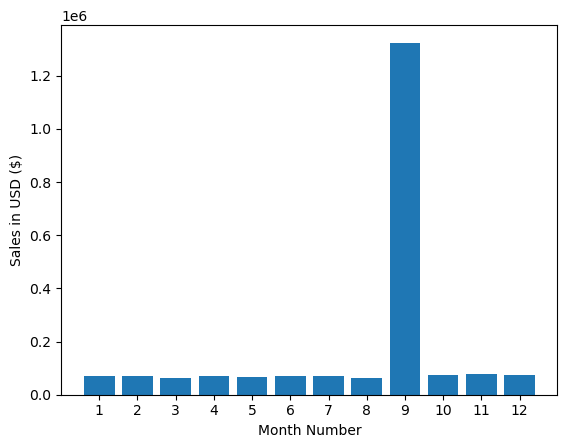

In [232]:
import matplotlib.pyplot as plt

plt.bar(months, sales_result)
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")
plt.show()

##### Q. 2) Which city had the highest number of sales?

In [233]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-01-09,"125 5th St, Atlanta, GA 30301",1,11.95


In [253]:
all_data['City']=all_data['Purchase Address'].str.split(',')

# We can also use the apply method as an alternative
# all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [254]:
all_data['City']=all_data['City'].str[1]

In [255]:
all_data['City']

0           Los Angeles
1                Austin
2           Los Angeles
3               Seattle
4               Atlanta
              ...      
11681       Los Angeles
11682     San Francisco
11683     San Francisco
11684     San Francisco
11685     San Francisco
Name: City, Length: 11629, dtype: object

##### Grab State from Purchase Address Column

In [247]:
all_data['State']=all_data['Purchase Address'].apply(lambda x:x.split(',')[2])

In [250]:
all_data['State']=all_data['State'].apply(lambda x:x.split()[0])

In [258]:
all_data['State']=all_data['City'] +' '+ all_data['State']

In [259]:
all_data['State']

0           Los Angeles CA
1                Austin TX
2           Los Angeles CA
3               Seattle WA
4               Atlanta GA
               ...        
11681       Los Angeles CA
11682     San Francisco CA
11683     San Francisco CA
11684     San Francisco CA
11685     San Francisco CA
Name: State, Length: 11629, dtype: object

In [265]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,2019-09-29,"511 8th St, Austin, TX 73301",9,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,2019-09-16,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,2019-09-27,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,2019-01-09,"125 5th St, Atlanta, GA 30301",1,11.95,Atlanta GA


In [ ]:
all_data=all_data.drop(columns='City')

In [266]:
all_data=all_data.rename(columns={'State':'City'})

In [283]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,2019-09-29,"511 8th St, Austin, TX 73301",9,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,2019-09-16,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA


In [284]:
# ANSWER TO Q.2

all_data.groupby('City')['Sales'].sum().sort_values(ascending=False)

City
 San Francisco CA    464529.65
 Los Angeles CA      354218.42
 New York City NY    301290.77
 Boston MA           247368.73
 Atlanta GA          171278.89
 Dallas TX           164215.85
 Seattle WA          156354.32
 Austin TX           106610.59
 Portland OR         104189.92
 Portland ME          28759.56
Name: Sales, dtype: float64

In [286]:
cities_sales_result=all_data.groupby('City')['Sales'].sum()

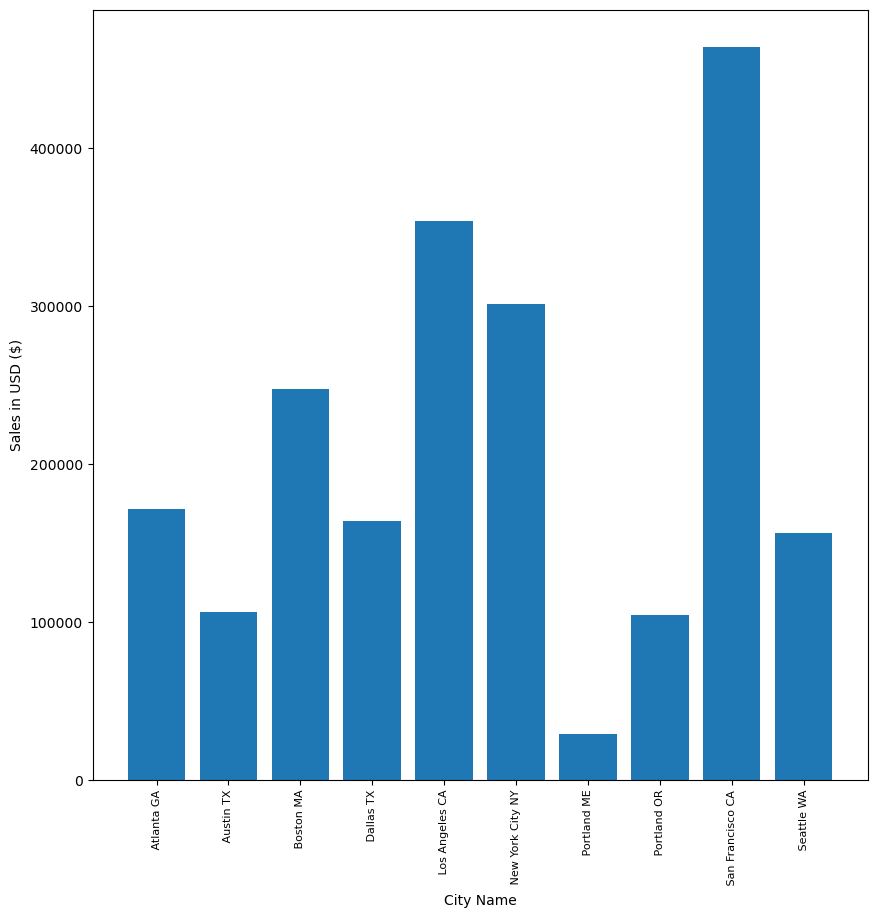

In [288]:
cities=[city for city, df in all_data.groupby('City')]
plt.bar(cities, cities_sales_result)
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
plt.show()

##### Q. 3) What time should we display advertisements to maximise likelihood of customer buying products?

In [289]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,2019-09-29,"511 8th St, Austin, TX 73301",9,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,2019-09-16,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,2019-09-27,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,2019-01-09,"125 5th St, Atlanta, GA 30301",1,11.95,Atlanta GA


#### Q. 4) What products are most often sold together?

In [302]:
df=all_data[all_data['Order ID'].duplicated(keep=False)] #This checks for duplicate ORDER ID, meaning one person bought multiple products.
df.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
20,248171,USB-C Charging Cable,1,11.95,2019-05-09,"705 Hill St, New York City, NY 10001",5,11.95,New York City NY
21,248171,USB-C Charging Cable,1,11.95,2019-05-09,"705 Hill St, New York City, NY 10001",5,11.95,New York City NY
60,248210,iPhone,1,700.00,2019-09-27,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco CA
61,248210,Lightning Charging Cable,1,14.95,2019-09-27,"292 Washington St, San Francisco, CA 94016",9,14.95,San Francisco CA
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles CA
71,248219,Google Phone,1,600.00,2019-09-24,"665 Maple St, Los Angeles, CA 90001",9,600.00,Los Angeles CA
117,248265,Vareebadd Phone,1,400.00,2019-09-24,"939 14th St, San Francisco, CA 94016",9,400.00,San Francisco CA
118,248265,Bose SoundSport Headphones,1,99.99,2019-09-24,"939 14th St, San Francisco, CA 94016",9,99.99,San Francisco CA
176,248323,Google Phone,1,600.00,2019-09-30,"725 10th St, Portland, OR 97035",9,600.00,Portland OR
177,248323,Bose SoundSport Headphones,1,99.99,2019-09-30,"725 10th St, Portland, OR 97035",9,99.99,Portland OR


In [ ]:
# Group the above dataframe by thier Order ID

In [304]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df

# 'transform' function is similar to apply- used to edit cell contents.

C:\Users\debod\AppData\Local\Temp\ipykernel_16556\2688317041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Grouped
20,248171,USB-C Charging Cable,1,11.95,2019-05-09,"705 Hill St, New York City, NY 10001",5,11.95,New York City NY,"USB-C Charging Cable,USB-C Charging Cable"
21,248171,USB-C Charging Cable,1,11.95,2019-05-09,"705 Hill St, New York City, NY 10001",5,11.95,New York City NY,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,2019-09-27,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco CA,"iPhone,Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.95,2019-09-27,"292 Washington St, San Francisco, CA 94016",9,14.95,San Francisco CA,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles CA,"Bose SoundSport Headphones,Google Phone"
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,"Google Phone,USB-C Charging Cable"


In [311]:
df=df[['Order ID','Grouped']].drop_duplicates()
df

,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [312]:
# To count the pairs of the products that occur together most frequently.

from itertools import combinations
from collections import Counter

In [327]:
count=Counter()

for row in df['Grouped']: # Grabs each row
    row_list=row.split(',') # Splits the row data to get a sublist.
    count.update(Counter(combinations(row_list, 2))) # Count combinations of row list in  pairs of 2
    
for key, value in count.most_common(3):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 61
('Google Phone', 'USB-C Charging Cable') 60
('iPhone', 'Wired Headphones') 27


In [ ]:
# Answer is [(('iPhone', 'Lightning Charging Cable'), 61)

##### What products sold the most and why?

In [332]:
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        1927
AA Batteries (4-pack)         1773
USB-C Charging Cable          1594
Lightning Charging Cable      1433
Wired Headphones              1302
Apple Airpods Headphones       968
Bose SoundSport Headphones     830
27in FHD Monitor               482
iPhone                         398
27in 4K Gaming Monitor         382
34in Ultrawide Monitor         378
Google Phone                   342
Flatscreen TV                  294
Macbook Pro Laptop             288
20in Monitor                   277
ThinkPad Laptop                249
Vareebadd Phone                126
LG Washing Machine              46
LG Dryer                        30
Name: Quantity Ordered, dtype: int32